In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import normalize

def MakeMesh(N):
    return np.linspace(0,1,N+2)

def MakeMesh2(N,n):
    a = np.linspace(0,n-1/N,int(N/2)+1)
    b = np.linspace(n,1,int(N/2)+1)
    return np.concatenate([a,b])

def MakeM(mesh):
    #Defining the matrix with N+2 to account for the boundary
    M = np.eye(len(mesh))
    for ii in range(1,len(mesh)-1):
        M[ii,ii-1] = mesh[ii]-mesh[ii-1]
        M[ii,ii] = 2*(mesh[ii+1]-mesh[ii-1])
        M[ii,ii+1] = mesh[ii+1]-mesh[ii]
    return 1/6*M[1:-1,1:-1] #Taking the releveant values. Thereby reducing the matrix to NxN.

def MakeS(mesh,v2):
    S = np.eye(len(mesh))
    for ii in range(1,len(mesh)-1):
        S[ii,ii-1] = -v2[ii-1]/(mesh[ii]-mesh[ii-1])
        S[ii,ii] = v2[ii]/(mesh[ii+1]-mesh[ii]) + v2[ii-1]/(mesh[ii]-mesh[ii-1])
        S[ii,ii+1] = -v2[ii]/(mesh[ii+1]-mesh[ii])
    return S[1:-1,1:-1]

def MakeAnalytical(mesh):
    mesh = mesh[1:-1]
    analytical = np.zeros([len(mesh),1])
    analytical[:,0] = np.sin(np.pi*mesh)
    return analytical

In [2]:
N = np.array([10,20,50,100,200,500,1000])
EigenvectorError = np.linspace(0,1,len(N))
EigenvalueError = np.linspace(0,1,len(N))
for i in range(len(N)):
    mesh = MakeMesh(N[i])
    analytical = MakeAnalytical(mesh)
    v2 = np.linspace(1,1,N[i]+2)
    M = MakeM(mesh)
    S = MakeS(mesh,v2)
    d, V = scipy.linalg.eigh(S,M,subset_by_index=[0,0],type=1) #Only the lowest right eigenvector is returned in V
    # print(max(abs(V)))
    # V = abs(V/max(abs(V)))
    V = abs(normalize(V,norm='max',axis=0))
    Residual = V-analytical
    EigenvectorError[i] = np.sqrt(1/N[i])*np.linalg.norm(Residual)
    EigenvalueError[i] = d - np.pi**2

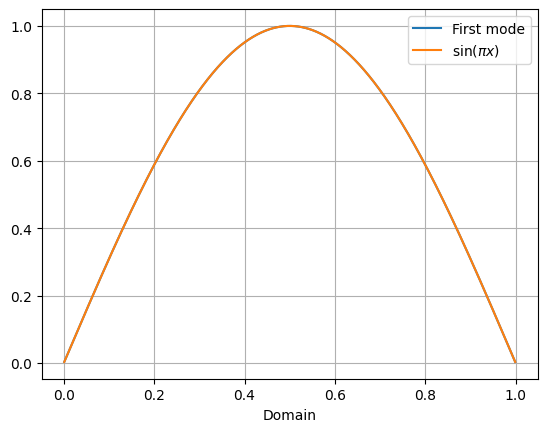

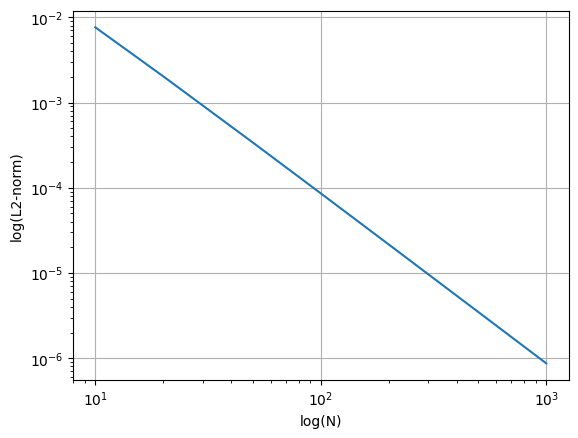

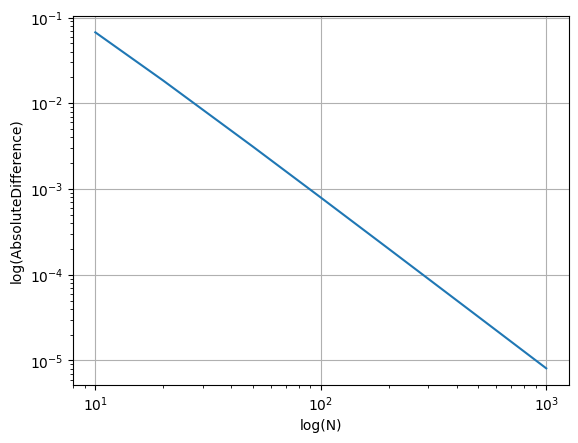

In [3]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.plot(mesh[1:-1],abs(V),label='First mode')
ax.plot(mesh[1:-1],analytical,label='$\sin(\pi x)$')
ax.legend(),ax.set_xlabel('Domain'),ax.grid()
fig2 = plt.figure();
ax = fig2.add_subplot(1,1,1)
ax.loglog(N,EigenvectorError),ax.set_xlabel('log(N)'),ax.set_ylabel('log(L2-norm)'),ax.grid()
fig3 = plt.figure();
ax = fig3.add_subplot(1,1,1)
ax.loglog(N,EigenvalueError),ax.set_xlabel('log(N)'),ax.set_ylabel('log(AbsoluteDifference)'),ax.grid()
plt.show()

(<matplotlib.legend.Legend at 0x25fb2869090>, Text(0.5, 0, 'Domain'), None)

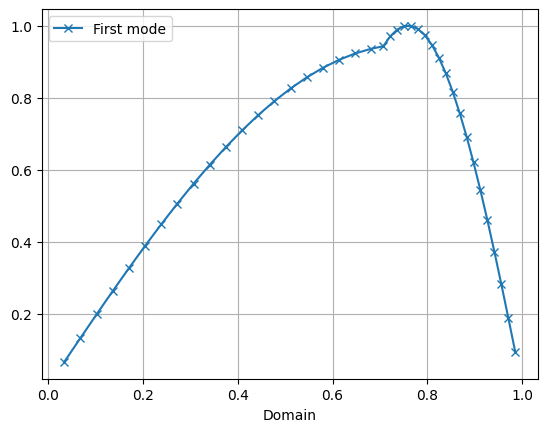

In [4]:
N = 40
mesh2 = MakeMesh2(N,np.sqrt(0.5)) # length = N + 3
v2 = np.concatenate([np.linspace(1,1,int(N/2)+1),np.linspace(0.1,0.1,int(N/2)+1)])
M = MakeM(mesh2)
S = MakeS(mesh2,v2)
d, V = scipy.linalg.eigh(S,M,subset_by_index=[0,0],type=1)
V = abs(normalize(V,norm='max',axis=0))
analytical = np.sin(np.pi*mesh2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(mesh2[1:-1],V,label='First mode',marker='x')
ax.legend(),ax.set_xlabel('Domain'),ax.grid()